Q1. T2D beta cell treatment group(GLP-1, estrogen, insulin 등) 내부에 존재할 다양한 latent subtype 존재?

Q2. treatment 간 shared 혹은 unique subtype이 존재?

- consistent_labels.csv : 각 세포가 속한 잠재 subtype(cluster) 레이블 (0, 1, 2, 3 중 하나)
    - cell_id : cell barcode와 어떤 mouse/study에서 유래 (-G4-STZ, -G5-STZ, 등)
    - l_4 : cluster 번호

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc

In [33]:
labels_df = pd.read_csv("C:/Users/user/Desktop/T1D/beta/out/consistent_labels.csv")
# 	        cell_id	           l_4
# 0	CGGGTCATCATGGTCA-1-G8-STZ	0
# 1	CCTTACGCATGGAATA-1-G4-STZ	1
# 2	GTCATTTTCCGCGTTT-1-G6-STZ	1

In [ ]:
# G4, G5, G6, G8 추출
labels_df['group'] = labels_df['cell_id'].str.extract(r'-(G\d)-STZ')
# G그룹 → treatment 조건으로 매핑
group_to_condition = {
    "G8": "T2D_mSTZ-treated_GLP-1_estrogen+insulin",
    "G6": "T2D_mSTZ-treated_GLP-1_estrogen",
    "G5": "T2D_mSTZ-treated_estrogen",
    "G4": "T2D_mSTZ-treated_GLP-1"
}
labels_df['condition'] = labels_df['group'].map(group_to_condition)
labels_df['cluster'] = 'C' + labels_df['cluster'].astype(str)
labels_df.rename(columns={'l_4': 'cluster'}, inplace=True)

# labels_df
#             cell_id	     cluster group	        condition
# 0	CGGGTCATCATGGTCA-1-G8-STZ	C0	G8	T2D_mSTZ-treated_GLP-1_estrogen+insulin
# 1	CCTTACGCATGGAATA-1-G4-STZ	C1	G4	T2D_mSTZ-treated_GLP-1
# 2	GTCATTTTCCGCGTTT-1-G6-STZ	C1	G6	T2D_mSTZ-treated_GLP-1_estrogen

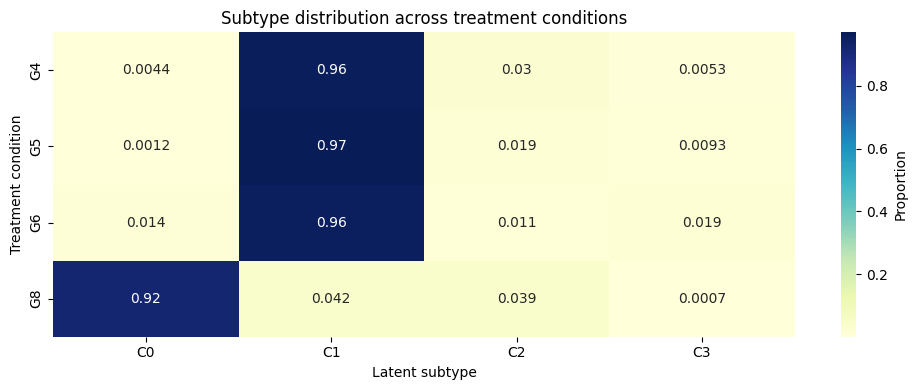

In [ ]:
# Q1: 같은 치료 내에서 다양한 subtype이 존재하는가?

import seaborn as sns
import matplotlib.pyplot as plt

# 교차표 (row: group, col: cluster)
ct = pd.crosstab(labels_df["group"], labels_df["cluster"], normalize='index')

plt.figure(figsize=(10, 4))
sns.heatmap(ct, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Proportion'})
plt.title("Subtype distribution across treatment conditions")
plt.xlabel("Latent subtype")
plt.ylabel("Treatment condition")
plt.tight_layout()
plt.show()

# heatmap 해석
# ex. G8-STZ에 C0 하나에만 몰려 있으므로, homogeneous한 반응 패턴

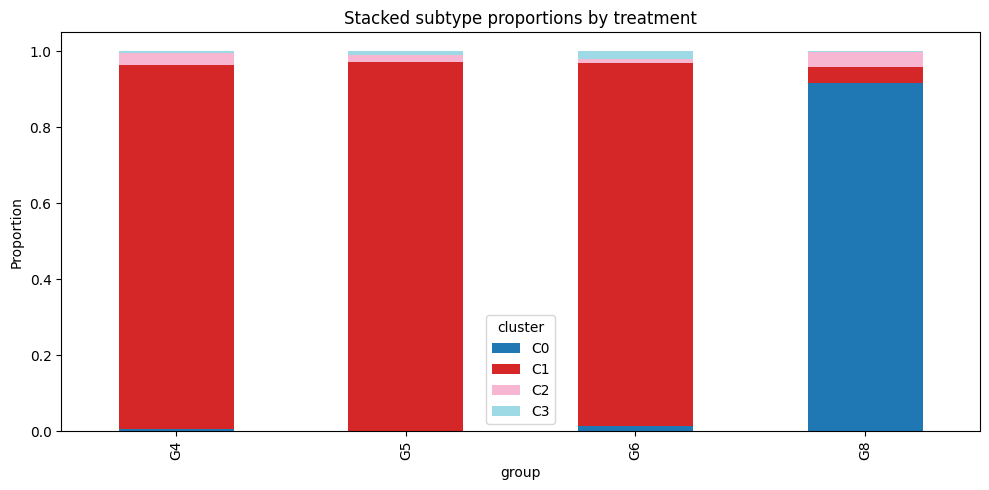

In [ ]:
# Q2: 치료 간 shared subtype이 있는가?

# barplot 그리기 (stacked bar)
subtype_dist = pd.crosstab(labels_df["group"], labels_df["cluster"], normalize='index')
subtype_dist.plot(kind="bar", stacked=True, figsize=(10, 5), colormap="tab20")
plt.title("Stacked subtype proportions by treatment")
plt.ylabel("Proportion")
plt.legend(title="cluster")
plt.tight_layout()
plt.show()

# 각 치료 간에 공통적으로 많이 나타나는 subtype (C0 등)이 있는지 
# 또는 특정 치료에만 존재하는 subtype이 있는지 확인 가능.

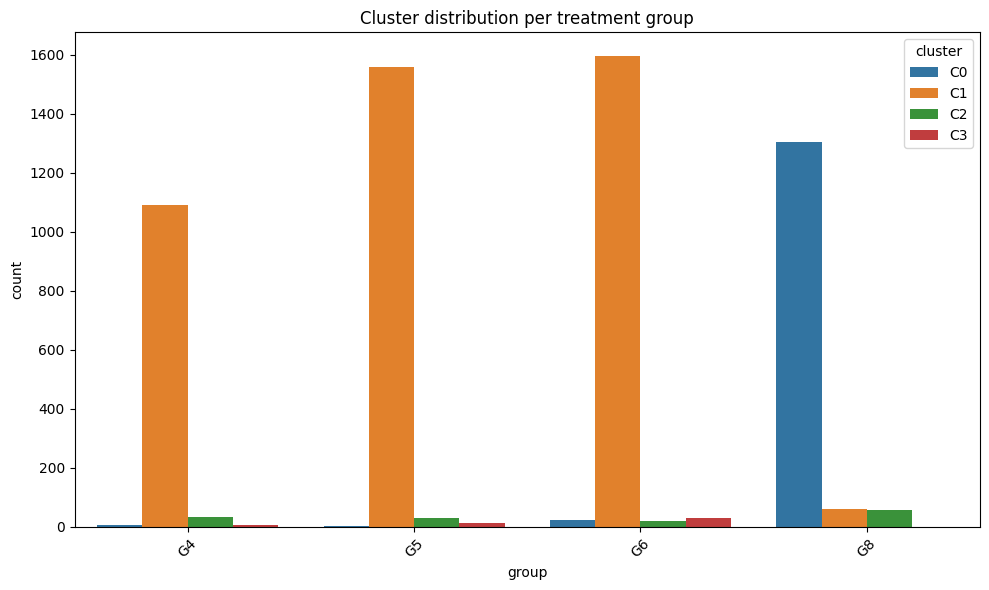

In [ ]:
# 각 treatment 그룹별 cluster 분포 시각화

# 1. 그룹별 클러스터 분포 수 세기
cluster_counts = labels_df.groupby(['group', 'cluster']).size().reset_index(name='count')

# 2. barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_counts, x='group', y='count', hue='cluster')
plt.xticks(rotation=45)
plt.title("Cluster distribution per treatment group")
plt.tight_layout()
plt.show()

# bar plot 해석:
# 한 클러스터로만 몰리면 → homogeneous response (ex: 치료가 매우 일관된 반응 유도)
# 여러 클러스터로 분산되면 → heterogeneous response (subtype 존재 가능성 ↑)